# Data Preprocessing

1. Load and preprocess the images.
2. Resize the images to a uniform size (e.g., 128x128 or 64x64 pixels).
3. Normalize the pixel values.
4. Split the dataset into training, validation, and test sets.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

100%|██████████| 225M/225M [00:02<00:00, 87.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alxmamaev/flowers-recognition/versions/2


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import  Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np
import shutil
from PIL import Image
import matplotlib.image as mpimg  # Use matplotlib for reading images in the plot


## Preprocessing


In [3]:
train_path = os.path.join(path, 'flowers')
test_path = os.path.join(path, 'flowers')

rootdir = '/content/'
classes_dir = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']  # Actual subdirectory names, update if needed

# Create directories if they don't exist
for i in classes_dir:
    if not os.path.exists(rootdir +'/train/' + i):
        os.makedirs(rootdir +'/train/' + i)
    if not os.path.exists(rootdir +'/test/' + i):
        os.makedirs(rootdir +'/test/' + i)

    source = os.path.join(train_path, i)
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)

    test_ratio = 0.30
    train_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    # Copy and resize images to train directory
    for name in train_FileNames:
        img = Image.open(name)
        img = img.resize((128, 128))
        img.save(rootdir +'/train/' + i + '/' + os.path.basename(name))

    # Copy and resize images to test directory
    for name in test_FileNames:
        img = Image.open(name)
        img = img.resize((128, 128))
        img.save(rootdir +'/test/' + i + '/' + os.path.basename(name))

In [4]:
train_path = rootdir + 'train'
test_path = rootdir + 'test'

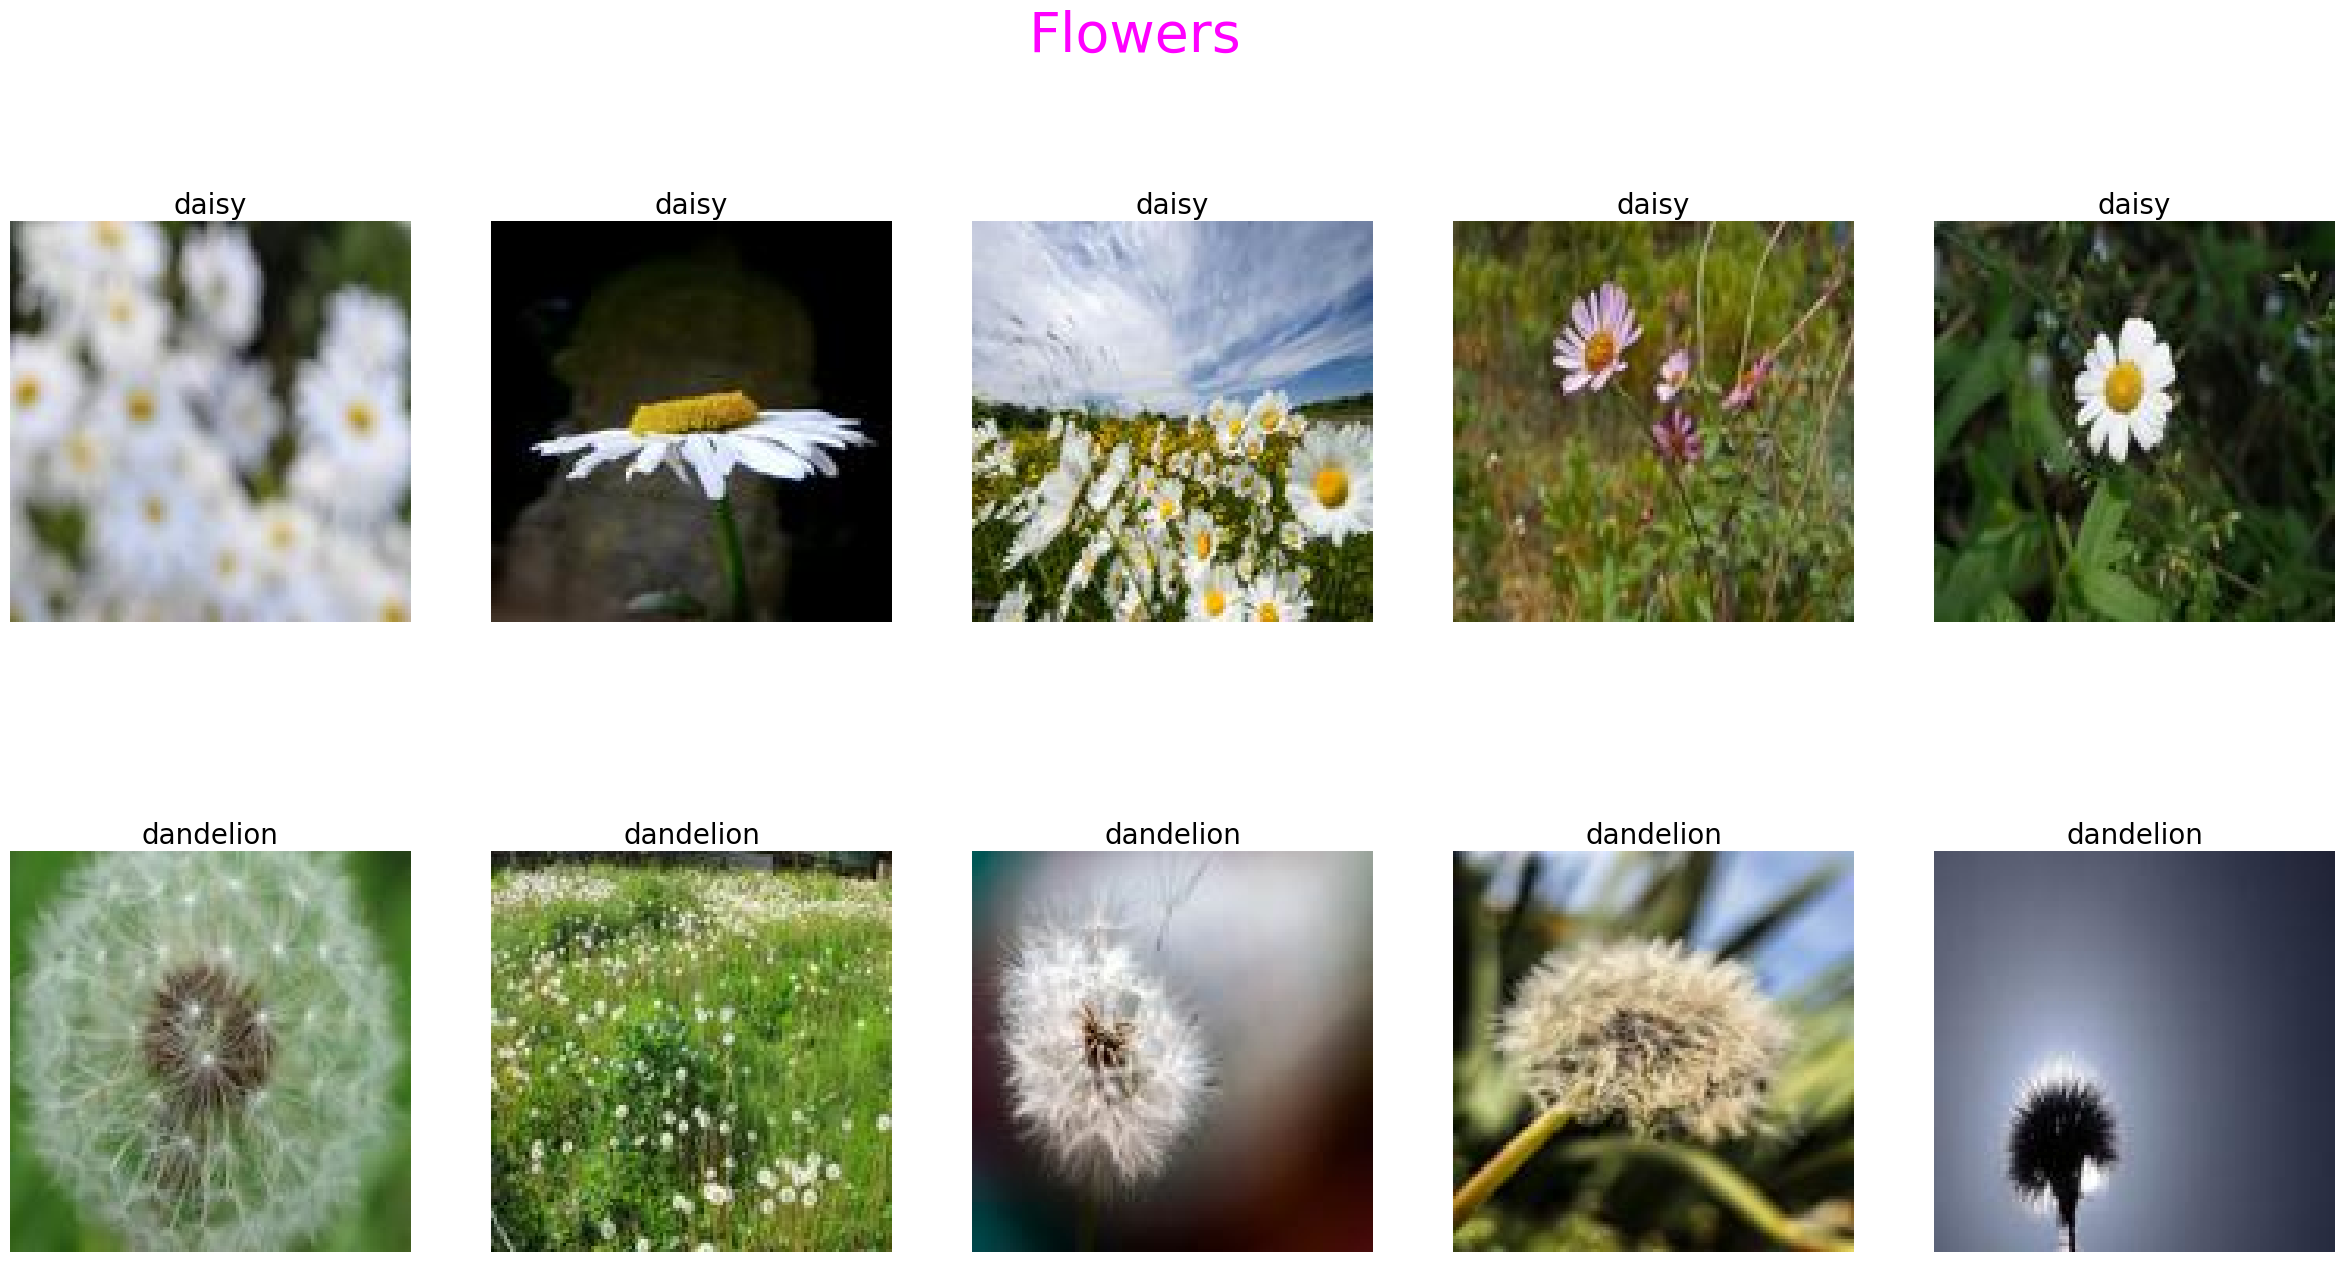

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(30, 15))
fig.suptitle('Flowers', color='magenta', fontsize=40)

# Loop over the classes and display images
for i in range(2):  # Display two classes
    for j in range(5):  # Display five images per class
        im_src = os.path.join(rootdir, 'train', classes_dir[i])
        FileNames = os.listdir(im_src)
        np.random.shuffle(FileNames)  # Shuffle to randomly pick images

        # Load and open the image
        im_src_path = os.path.join(im_src, FileNames[j])
        img = Image.open(im_src_path)

        # Display the image
        ax[i, j].imshow(img)
        ax[i, j].set_title(classes_dir[i], fontsize=20)
        ax[i, j].axis('off')  # Turn off the axis
plt.show()

# CNN Architecture
1. Build a custom CNN model using Keras deep learning API.
2. The CNN should consist of convolutional layers, max-pooling layers, and
fully connected layers with the suitable activation function for each if needed.
3. Experiment with the architecture by varying the number of layers, filter sizes,
and types of activation functions. You must use at least two different
variations of the architecture.

We need to resize the images


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 2418 images belonging to 5 classes.
Found 601 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


# Model Training
1. Train the model on the flower dataset using an appropriate loss function.
2. Use an optimizer like SGD or Adam to train the model.
3. Track and plot the training and validation loss and accuracy over epochs.
4. Implement early stopping to avoid overfitting.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_builder():
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3),
              activation='relu',
              kernel_initializer='he_uniform',
              padding='same',
              input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    # Output Layer (5 classes)
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = model_builder()
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,

    callbacks = [early_stop]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.1898 - loss: 15.5370 - val_accuracy: 0.2080 - val_loss: 1.5413
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2275 - loss: 1.5188 - val_accuracy: 0.4226 - val_loss: 1.4696
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3771 - loss: 1.4338 - val_accuracy: 0.4027 - val_loss: 1.4313
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.4514 - loss: 1.2843 - val_accuracy: 0.4975 - val_loss: 1.2639
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5192 - loss: 1.1526 - val_accuracy: 0.5624 - val_loss: 1.2438
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5487 - loss: 1.1437 - val_accuracy: 0.5657 - val_loss: 1.1520
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5722 - loss: 1.0710 - val_accuracy: 0.5624 - val_loss: 1.1603
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5869 - loss: 1.0415 - val_accuracy: 0.5541 - val_loss: 1.1494

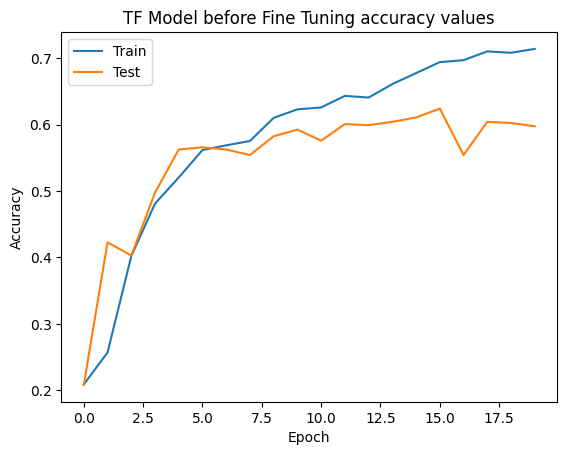

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TF Model before Fine Tuning accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

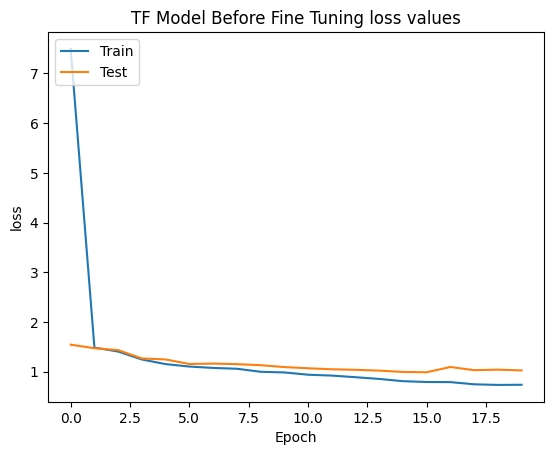

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TF Model Before Fine Tuning loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluation
1. Evaluate the model on the test dataset.


In [14]:
# Evaluate the model on the test set using the test generator
loss, acc = model.evaluate(test_generator)

# Print the test accuracy
print("Test accuracy is {:.2f}%".format(100 * acc))


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 568ms/step - accuracy: 0.6342 - loss: 1.0091
Test accuracy is 63.41%


# Model 2



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_builder2():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3),
              activation='relu',
              kernel_initializer='he_uniform',
              padding='same',
              input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
     # Block 3
    model.add(Conv2D(64, (3, 3), activation='softmax'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    # Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    # Output Layer (5 classes)
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [29]:

# Build the model
model = model_builder2()
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,

    callbacks = [early_stop]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 220s 6s/step - accuracy: 0.2670 - loss: 1.5487 - val_accuracy: 0.4975 - val_loss: 1.2204
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.4896 - loss: 1.1946 - val_accuracy: 0.5191 - val_loss: 1.1724
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.5330 - loss: 1.1141 - val_accuracy: 0.5092 - val_loss: 1.1694
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.5450 - loss: 1.0962 - val_accuracy: 0.5125 - val_loss: 1.1414
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.5669 - loss: 1.0729 - val_accuracy: 0.5940 - val_loss: 1.0209
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.6255 - loss: 0.9595 - val_accuracy: 0.6223 - val_loss: 0.9664
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.6439 - loss: 0.9131 - val_accuracy: 0.6206 - val_loss: 0.9583
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 262s 6s/step - accuracy: 0.6636 - loss: 0.8726 - val_accuracy: 0.6323 - v

# Evaluation

In [30]:
# Evaluate the model on the test set using the test generator
loss, acc = model.evaluate(test_generator)

# Print the test accuracy
print("Test accuracy is {:.2f}%".format(100 * acc))


21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7015 - loss: 0.8380
Test accuracy is 70.49%


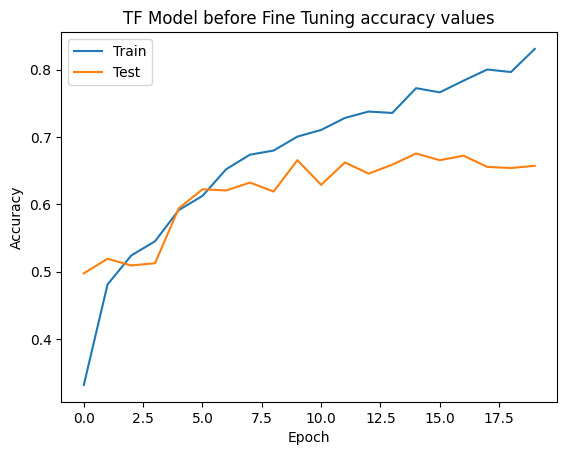

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TF Model before Fine Tuning accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

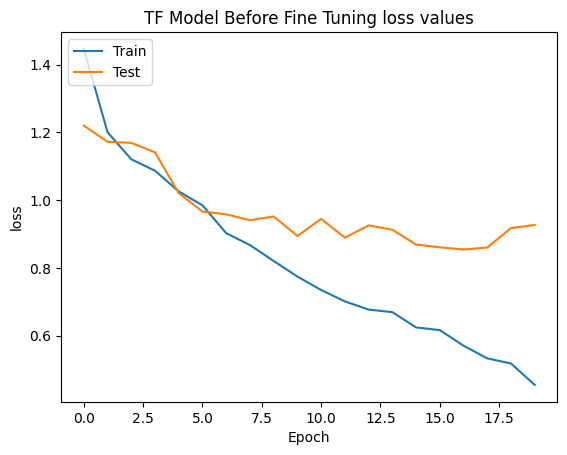

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TF Model Before Fine Tuning loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 3

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_builder3():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3),
              activation='relu',
              kernel_initializer='he_uniform',
              padding='same',
              input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    # Block 2
    model.add(Conv2D(128, (4,4), activation='softmax'))
    model.add(MaxPooling2D((2, 2)))
     # Block 3
    model.add(Conv2D(128, (3, 3), activation='softmax'))
    model.add(MaxPooling2D((2, 2)))
    # Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    # Output Layer (5 classes)
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [39]:
# Build the model
model = model_builder3()
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,

    callbacks = [early_stop]
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 330s 9s/step - accuracy: 0.2021 - loss: 1.6091 - val_accuracy: 0.2446 - val_loss: 1.6053
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 371s 8s/step - accuracy: 0.2449 - loss: 1.6054 - val_accuracy: 0.2446 - val_loss: 1.6030
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 318s 8s/step - accuracy: 0.2310 - loss: 1.6050 - val_accuracy: 0.2446 - val_loss: 1.6015
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 315s 8s/step - accuracy: 0.2488 - loss: 1.6015 - val_accuracy: 0.2446 - val_loss: 1.6006
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 322s 8s/step - accuracy: 0.2425 - loss: 1.6000 - val_accuracy: 0.2446 - val_loss: 1.5998
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 323s 8s/step - accuracy: 0.2435 - loss: 1.6001 - val_accuracy: 0.2446 - val_loss: 1.5994
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 320s 8s/step - accuracy: 0.2440 - loss: 1.5973 - val_accuracy: 0.2446 - val_loss: 1.5990
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 314s 8s/step - accuracy: 0.2548 - loss: 1.5997 - val_accuracy: 0.2446 - v

In [40]:
# Evaluate the model on the test set using the test generator
loss, acc = model.evaluate(test_generator)

# Print the test accuracy
print("Test accuracy is {:.2f}%".format(100 * acc))


21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2631 - loss: 1.5931
Test accuracy is 24.35%


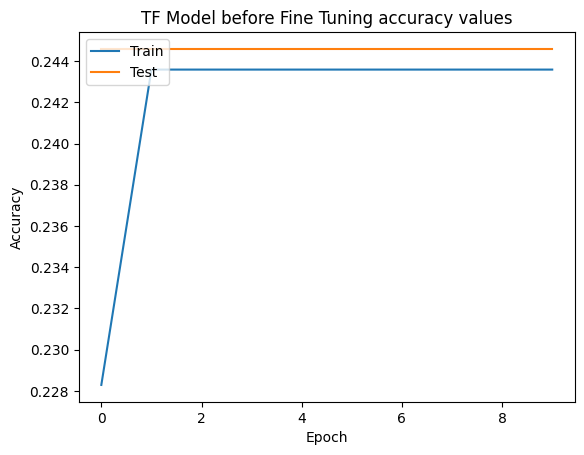

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TF Model before Fine Tuning accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

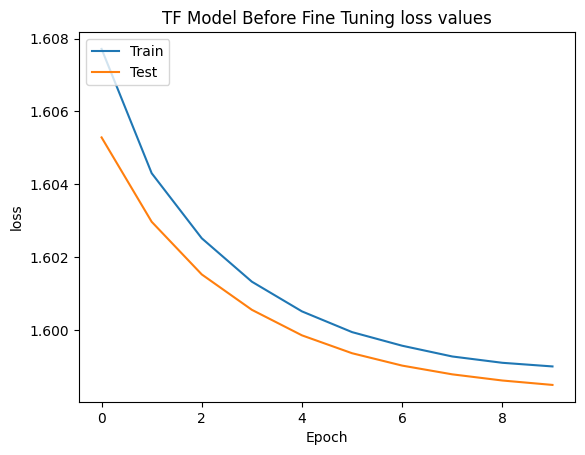

In [42]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TF Model Before Fine Tuning loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()